In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [6]:
type(data)

dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9960,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.928046e+07,1.928046e+07,NaN,1,NaN,NaN,None,2023-02-03T16:03:00.000Z,23627.829567,3.077990e+10,-7.1256,0.514674,-0.883212,2.732827,40.176872,38.211312,10.897011,4.555555e+11,41.8835,4.961844e+11,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492
1,1027,Ethereum,ETH,ethereum,6415,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-03T16:03:00.000Z,1665.568006,9.786806e+09,-11.1545,0.504221,-0.680111,5.422642,32.744550,31.437833,1.757151,2.038220e+11,18.7393,2.038220e+11,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492
2,825,Tether,USDT,tether,46730,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.802860e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-03T16:03:00.000Z,1.000116,4.210376e+10,-7.5951,-0.011232,-0.000077,-0.009209,0.035496,0.003917,0.001954,6.803649e+10,6.2536,7.315026e+10,None,2023-02-03T16:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-03 16:05:22.538492
3,1839,BNB,BNB,bnb,1177,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.579010e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-03T16:03:00.000Z,331.801066,9.031731e+08,-7.6708,-0.043421,1.104928,9.014339,29.167349,14.315524,-5.502799,5.239171e+10,4.8176,6.636021e+10,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492
4,3408,USD Coin,USDC,usd-coin,9779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.244792e+10,4.244792e+10,NaN,5,NaN,NaN,None,2023-02-03T16:03:00.000Z,1.000057,3.997216e+09,-7.4730,-0.003965,0.008683,0.003658,0.002273,-0.000834,-0.011802,4.245035e+10,3.9030,4.245035e+10,None,2023-02-03T16:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-03 16:05:22.538492
5,52,XRP,XRP,xrp,880,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.080361e+10,9.998914e+10,NaN,6,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.410713,9.645259e+08,-12.3703,0.130617,-0.869206,0.899588,18.169350,4.866898,-17.789521,2.086570e+10,1.9185,4.107129e+10,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492
6,4687,Binance USD,BUSD,binance-usd,6110,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.608437e+10,1.608437e+10,NaN,7,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.999885,1.175141e+10,-3.2533,-0.068262,-0.041335,-0.011650,-0.071947,-0.027556,-0.013995,1.608253e+10,1.4786,1.608253e+10,None,2023-02-03T16:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-03 16:05:22.538492
7,2010,Cardano,ADA,cardano,644,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.460011e+10,3.543126e+10,NaN,8,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.403715,4.529637e+08,-28.5988,0.490090,-0.280454,6.564785,50.658241,25.316377,-5.926628,1.396857e+10,1.2839,1.816716e+10,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492
8,74,Dogecoin,DOGE,dogecoin,637,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,No

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    if not os.path.isfile(r'C:\Users\Abhishek Gour\Documents\API CURRENCY\API.csv'):
        df.to_csv(r'C:\Users\Abhishek Gour\Documents\API CURRENCY\API.csv' , header='column_names')
    else:
        df.to_csv(r'C:\Users\Abhishek Gour\Documents\API CURRENCY\API.csv' , mode='a' , header=False)
    
    
    
# Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [10]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('API RUNNER COMPLETED')
    sleep(60)
exit()

API RUNNER COMPLETED
API RUNNER COMPLETED


KeyboardInterrupt: 

In [11]:
df72 = pd.read_csv(r'C:\Users\Abhishek Gour\Documents\API CURRENCY\API.csv')



In [12]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9947,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.927873e+07,1.927873e+07,NaN,1,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,23039.419031,2.133977e+10,-10.2311,-0.103026,-0.410003,1.699931,37.629928,35.787316,13.667865,4.441708e+11,42.5736,4.838278e+11,NaN,2023-02-01T16:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-01 16:26:26.245059,NaN
1,1,1027,Ethereum,ETH,ethereum,6394,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,1579.376040,5.962133e+09,-18.8560,-0.038615,-0.542886,1.895139,29.554697,24.129893,2.272338,1.932744e+11,18.5253,1.932744e+11,NaN,2023-02-01T16:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-01 16:26:26.245059,NaN
2,2,825,Tether,USDT,tether,46653,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.779298e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,1.000095,2.915393e+10,-11.9572,-0.001591,0.002465,-0.003423,0.028604,0.002094,0.005123,6.779944e+10,6.4985,7.314873e+10,NaN,2023-02-01T16:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-01 16:26:26.245059,NaN
3,3,1839,BNB,BNB,bnb,1172,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.579014e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,309.115478,4.559608e+08,-12.7877,-0.068969,-1.106775,2.690041,25.103052,5.858381,-6.294772,4.880977e+10,4.6780,6.182310e+10,NaN,2023-02-01T16:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-01 16:26:26.245059,NaN
4,4,3408,USD Coin,USDC,usd-coin,9746,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.236023e+10,4.236023e+10,NaN,5,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,0.999835,2.812230e+09,-13.0998,0.003553,-0.020221,-0.038168,-0.024615,-0.012624,-0.017626,4.235325e+10,4.0608,4.235325e+10,NaN,2023-02-01T16:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-01 16:26:26.245059,NaN
5,5,52,XRP,XRP,xrp,880,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.080361e+10,9.998914e+10,NaN,6,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,0.399414,9.069731e+08,-15.9855,-0.497748,-0.953774,-1.840743,13.950473,0.782652,-12.278991,2.029165e+10,1.9451,3.994135e+10,NaN,2023-02-01T16:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-01 16:26:26.245059,NaN
6,6,4687,Binance USD,BUSD,binance-usd,6101,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.609437e+10,1.609437e+10,NaN,7,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,0.999693,7.433864e+09,-14.5901,-0.060332,-0.088475,-0.047829,-0.067210,-0.052078,-0.088414,1.608943e+10,1.5422,1.608943e+10,NaN,2023-02-01T16:23:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-01 16:26:26.245059,NaN
7,7,2010,Cardano,ADA,cardano,640,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.459368e+10,3.541331e+10,NaN,8,NaN,NaN,NaN,2023-02-01T16:23:00.000Z,0.376305,3.930191e+08,-8.6511,-0.968820,-3.804030,5.456989,47.689896,15.875962,-4.695944,1.301777e+10,1.2477,1.693372e+10,NaN,2023-02-01T16:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-01 16:26:26.245059,NaN
8,8,74,Dogecoin,DOGE,dogecoin,637,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'm

In [13]:
pd.set_option('display.float_format' , lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9960,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19280462.00000,19280462.00000,NaN,1,NaN,NaN,None,2023-02-03T16:03:00.000Z,23627.82957,30779899571.58569,-7.12560,0.51467,-0.88321,2.73283,40.17687,38.21131,10.89701,455555470112.74719,41.88350,496184420911.06000,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492,NaT
1,1027,Ethereum,ETH,ethereum,6415,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-03T16:03:00.000Z,1665.56801,9786805857.11933,-11.15450,0.50422,-0.68011,5.42264,32.74455,31.43783,1.75715,203821996337.35995,18.73930,203821996337.35999,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492,NaT
2,825,Tether,USDT,tether,46730,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68028597303.98090,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-03T16:03:00.000Z,1.00012,42103758244.37914,-7.59510,-0.01123,-0.00008,-0.00921,0.03550,0.00392,0.00195,68036492943.43688,6.25360,73150255413.16000,None,2023-02-03T16:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-03 16:05:22.538492,NaT
3,1839,BNB,BNB,bnb,1177,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157900977.10004,159979963.59043,NaN,4,NaN,NaN,None,2023-02-03T16:03:00.000Z,331.80107,903173070.63967,-7.67080,-0.04342,1.10493,9.01434,29.16735,14.31552,-5.50280,52391712557.14577,4.81760,66360213241.68000,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492,NaT
4,3408,USD Coin,USDC,usd-coin,9779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42447923446.31686,42447923446.31686,NaN,5,NaN,NaN,None,2023-02-03T16:03:00.000Z,1.00006,3997216423.08759,-7.47300,-0.00397,0.00868,0.00366,0.00227,-0.00083,-0.01180,42450352935.80190,3.90300,42450352935.80000,None,2023-02-03T16:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-03 16:05:22.538492,NaT
5,52,XRP,XRP,xrp,880,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50803611248.00000,99989140193.00000,NaN,6,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.41071,964525936.87183,-12.37030,0.13062,-0.86921,0.89959,18.16935,4.86690,-17.78952,20865697837.93381,1.91850,41071288684.73000,None,2023-02-03T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-03 16:05:22.538492,NaT
6,4687,Binance USD,BUSD,binance-usd,6110,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16084373007.81338,16084373007.81338,NaN,7,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.99989,11751408119.58608,-3.25330,-0.06826,-0.04134,-0.01165,-0.07195,-0.02756,-0.01399,16082529674.33707,1.47860,16082529674.34000,None,2023-02-03T16:03:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-02-03 16:05:22.538492,NaT
7,2010,Cardano,ADA,cardano,644,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34600113225.30700,35431262324.28100,NaN,8,NaN,NaN,None,2023-02-03T16:03:00.000Z,0.40371,452963688.63149,-28.59880,0.49009,-0.28045,6.56479,50.65824,25.31638,-5.92663,13968574640.74538,1.28390,18167161903.21000,None,2023-02-03T16:03:00

In [15]:
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h' ,'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [16]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.57464,-0.87776,2.74494,40.20925,38.25401,10.91666
Ethereum,0.53268,-0.69771,5.44619,32.78082,31.48151,1.78469
Tether,-0.01152,0.00000,-0.00948,0.03583,0.00401,0.00158
BNB,0.14733,1.08821,9.04120,29.21886,14.38023,-5.45895
USD Coin,-0.00514,0.00311,0.00394,0.00264,0.00203,-0.01179
XRP,0.17932,-0.83604,0.94386,18.24129,4.94085,-17.71267
Binance USD,-0.04898,-0.04177,0.00116,-0.05460,-0.01206,-0.01341
Cardano,0.54264,-0.28659,6.59836,50.74166,25.39192,-5.88176
Dogecoin,0.34544,-0.75202,7.64181,27.64456,-10.31652,-27.11223


In [17]:
df4 = df3.stack()

In [18]:
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.57464
             quote.USD.percent_change_24h    -0.87776
             quote.USD.percent_change_7d      2.74494
             quote.USD.percent_change_30d    40.20925
             quote.USD.percent_change_60d    38.25401
             quote.USD.percent_change_90d    10.91666
Ethereum     quote.USD.percent_change_1h      0.53268
             quote.USD.percent_change_24h    -0.69771
             quote.USD.percent_change_7d      5.44619
             quote.USD.percent_change_30d    32.78082
             quote.USD.percent_change_60d    31.48151
             quote.USD.percent_change_90d     1.78469
Tether       quote.USD.percent_change_1h     -0.01152
             quote.USD.percent_change_24h     0.00000
             quote.USD.percent_change_7d     -0.00948
             quote.USD.percent_change_30d     0.03583
             quote.USD.percent_change_60d     0.00401
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')

df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.57464
            quote.USD.percent_change_24h  -0.87776
            quote.USD.percent_change_7d    2.74494
            quote.USD.percent_change_30d  40.20925
            quote.USD.percent_change_60d  38.25401
            quote.USD.percent_change_90d  10.91666
Ethereum    quote.USD.percent_change_1h    0.53268
            quote.USD.percent_change_24h  -0.69771
            quote.USD.percent_change_7d    5.44619
            quote.USD.percent_change_30d  32.78082
            quote.USD.percent_change_60d  31.48151
            quote.USD.percent_change_90d   1.78469
Tether      quote.USD.percent_change_1h   -0.01152
            quote.USD.percent_change_24h   0.00000
            quote.USD.percent_change_7d   -0.00948
            quote.USD.percent_change_30d   0.03583
            quote.USD.percent_change_60d   0.00401
            quote.USD.percent_change_90d   0.00158
BNB         quote.USD.percent_change_1h    0.14733
            quote.USD.percent_change_24h   1.08821
            quote.USD.percent_change_7d    9.04120
            quote.USD.percent_change_30d  29.21886
            quote.USD.percent_change_60d  14.38023
            quote.USD.percent_change_90d  -5.45895
USD Coin    quote.USD.percent_change_1h   -0.00514
            quote.USD.percent_change_24h   0.00311
            quote.USD.percent_change_7d    0.00394
            quote.USD.percent_change_30d   0.00264
            quote.USD.percent_change_60d   0.00203
            quote.USD.percent_change_90d  -0.01179
XRP         quote.USD.percent_change_1h    0.17932
            quote.USD.percent_change_24h  -0.83604
            quote.USD.percent_change_7d    0.94386
            quote.USD.percent_change_30d  18.24129
            quote.USD.percent_change_60d   4.94085
            quote.USD.percent_change_90d -17.71267
Binance USD quote.USD.percent_change_1h   -0.04898
            quote.USD.percent_change_24h  -0.04177
            quote.USD.percent_change_7d    0.00116
            quote.USD.percent_change_30d  -0.05460
            quote.USD.percent_change_60d  -0.01206
            quote.USD.percent_change_90d  -0.01341
Cardano     quote.USD.percent_change_1h    0.54264
            quote.USD.percent_change_24h  -0.28659
            quote.USD.percent_change_7d    6.59836
            quote.USD.percent_change_30d  50.74166
            quote.USD.percent_change_60d  25.39192
            quote.USD.percent_change_90d  -5.88176
Dogecoin    quote.USD.percent_change_1h    0.34544
            quote.USD.percent_change_24h  -0.75202
            quote.USD.percent_change_7d    7.64181
            quote.USD.percent_change_30d  27.64456
            quote.USD.percent_change_60d -10.31652
            quote.USD.percent_change_90d -27.11223
Polygon     quote.USD.percent_change_1h    0.90320
            quote.USD.percent_change_24h  -0.71940
            quote.USD.percent_change_7d    7.50393
            quote.USD.percent_change_30d  52.21080
            quote.USD.percent_change_60d  33.75927
            quote.USD.percent_change_90d   1.05967
Solana      quote.USD.percent_change_1h    0.83164
            quote.USD.percent_change_24h  -0.37518
            quote.USD.percent_change_7d    4.44321
            quote.USD.percent_change_30d  87.21224
            quote.USD.percent_change_60d  81.41610
            quote.USD.percent_change_90d -33.45765
Polkadot    quote.USD.percent_change_1h   -0.16270
            quote.USD.percent_change_24h   4.93256
            quote.USD.percent_change_7d    8.48395
            quote.USD.percent_change_30d  49.67969
            quote.USD.percent_change_60d  25.65133
            quote.USD.percent_change_90d  -2.22014
Litecoin    quote.USD.percent_change_1h    0.39251
            quote.USD.percent_change_24h  -1.10968
            quote.USD.percent_change_7d   13.40883
            quote.USD.percent_change_30d  30.34959
            quote.USD.percent_change_60d  21.30302
            quo

In [21]:
type(df5)

pandas.core.frame.DataFrame

In [22]:
df5.count()

values    90
dtype: int64

In [23]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,0.57464
1,-0.87776
2,2.74494
3,40.20925
4,38.25401
5,10.91666
6,0.53268
7,-0.69771
8,5.44619
9,32.78082


In [24]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.57464
1,Bitcoin,quote.USD.percent_change_24h,-0.87776
2,Bitcoin,quote.USD.percent_change_7d,2.74494
3,Bitcoin,quote.USD.percent_change_30d,40.20925
4,Bitcoin,quote.USD.percent_change_60d,38.25401
5,Bitcoin,quote.USD.percent_change_90d,10.91666
6,Ethereum,quote.USD.percent_change_1h,0.53268
7,Ethereum,quote.USD.percent_change_24h,-0.69771
8,Ethereum,quote.USD.percent_change_7d,5.44619
9,Ethereum,quote.USD.percent_change_30d,32.78082


In [25]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.57464
1,Bitcoin,quote.USD.percent_change_24h,-0.87776
2,Bitcoin,quote.USD.percent_change_7d,2.74494
3,Bitcoin,quote.USD.percent_change_30d,40.20925
4,Bitcoin,quote.USD.percent_change_60d,38.25401
5,Bitcoin,quote.USD.percent_change_90d,10.91666
6,Ethereum,quote.USD.percent_change_1h,0.53268
7,Ethereum,quote.USD.percent_change_24h,-0.69771
8,Ethereum,quote.USD.percent_change_7d,5.44619
9,Ethereum,quote.USD.percent_change_30d,32.78082


In [34]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.57464
1,Bitcoin,24h,-0.87776
2,Bitcoin,7d,2.74494
3,Bitcoin,30d,40.20925
4,Bitcoin,60d,38.25401
5,Bitcoin,90d,10.91666
6,Ethereum,quote.USD.percent_change_1h,0.53268
7,Ethereum,24h,-0.69771
8,Ethereum,7d,5.44619
9,Ethereum,30d,32.78082


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

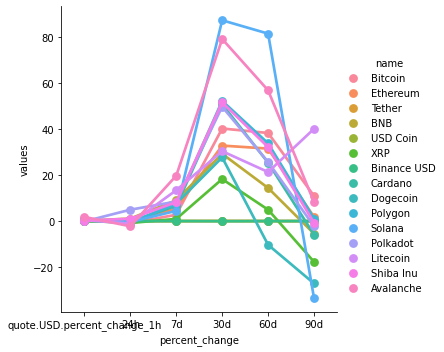

In [36]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [37]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23627.82957,2023-02-03 16:05:22.538492
1,Ethereum,1665.56801,2023-02-03 16:05:22.538492
2,Tether,1.00012,2023-02-03 16:05:22.538492
3,BNB,331.80107,2023-02-03 16:05:22.538492
4,USD Coin,1.00006,2023-02-03 16:05:22.538492
5,XRP,0.41071,2023-02-03 16:05:22.538492
6,Binance USD,0.99989,2023-02-03 16:05:22.538492
7,Cardano,0.40371,2023-02-03 16:05:22.538492
8,Dogecoin,0.09232,2023-02-03 16:05:22.538492
9,Polygon,1.22602,2023-02-03 16:05:22.538492


In [41]:
df10 = df[['name','quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")

df10

,name,quote.USD.price,timestamp
0,Bitcoin,23627.82957,2023-02-03 16:05:22.538492
0,Bitcoin,23627.82957,NaT
0,Bitcoin,23640.68323,NaT


ValueError: cannot reindex from a duplicate axis

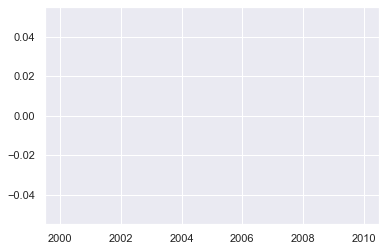

In [43]:
sns.set_theme(style="darkgrid")


sns.lineplot(x='timestamp' , y='quote.USD.price' , data = df10)

In [44]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23627.82957,2023-02-03 16:05:22.538492
0,Bitcoin,23627.82957,NaT
0,Bitcoin,23640.68323,NaT


ValueError: cannot reindex from a duplicate axis

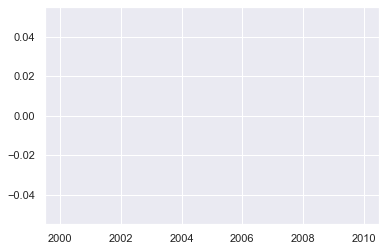

In [45]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
# # Now to do something much simpler
# # we are going to create a dataframe with the columns we want

# df10 = df[['name','quote.USD.price','timestamp']]
# df10 = df10.query("name == 'Bitcoin'")
# df10
# sns.set_theme(style="darkgrid")

# sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

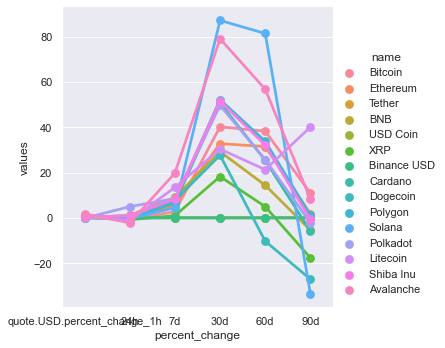

In [47]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [48]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23627.82957,2023-02-03 16:05:22.538492
0,Bitcoin,23627.82957,NaT
0,Bitcoin,23640.68323,NaT


ValueError: cannot reindex from a duplicate axis

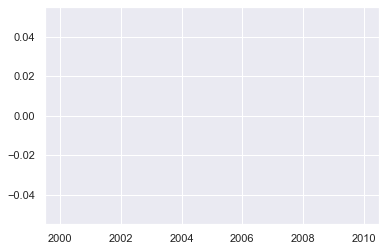

In [49]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)